1. Importing dependencies:

In [1]:
import os
import json
from zipfile import ZipFile
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

2. Data Collection (Kagle API):

In [3]:
kaggle_dic = json.load(open('kaggle.json'))

In [4]:
kaggle_dic.keys()

dict_keys(['username', 'key'])

A- Setup kaggle api as environement variables:

In [5]:
os.environ["KAGGLE_USERNAME"] = kaggle_dic["username"]
os.environ["KAGGLE_KEY"] = kaggle_dic["key"]

B- Loading the dataset:

In [16]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:05<2:54:03, 210kB/s]
  0%|          | 2.00M/2.04G [00:06<1:50:43, 329kB/s]
  0%|          | 3.00M/2.04G [00:08<1:23:03, 439kB/s]
  0%|          | 4.00M/2.04G [00:10<1:15:01, 485kB/s]
  0%|          | 5.00M/2.04G [00:10<57:23, 634kB/s]  
  0%|          | 6.00M/2.04G [00:12<51:56, 700kB/s]
  0%|          | 7.00M/2.04G [00:14<1:03:59, 568kB/s]
  0%|          | 8.00M/2.04G [00:16<1:07:57, 535kB/s]
  0%|          | 9.00M/2.04G [00:20<1:28:46, 409kB/s]
  0%|          | 10.0M/2.04G [00:22<1:24:44, 429kB/s]
  1%|          | 11.0M/2.04G [00:24<1:17:29, 468kB/s]
  1%|          | 12.0M/2.04G [00:27<1:21:11, 447kB/s]
  1%|          | 13.0M/2.04G [00:30<1:25:20, 425kB/s]
  1%|          | 14.0M/2.04G [00:31<1:18:58, 459kB/s]
  1%|          | 15.0M/2.04G [00:33<1:10:42, 512kB/s]
  1%|          | 16.0M/2.04G [00:34<1:03:38, 569kB/s]
  1%|          | 17.0M/2.04G [00:36<59:52, 605kB/s]  
  1%|          | 18.0M/2.04G [00:38<1:0

C- Unzib the dataset file:

In [17]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
        zip_ref.extractall()

OSError: [Errno 22] Invalid argument

3. Preprocessing:

A- Creating the variables of the data:

In [2]:
data_dir = 'plantvillage dataset\color'

B- Showing an image:

(256, 256, 3)


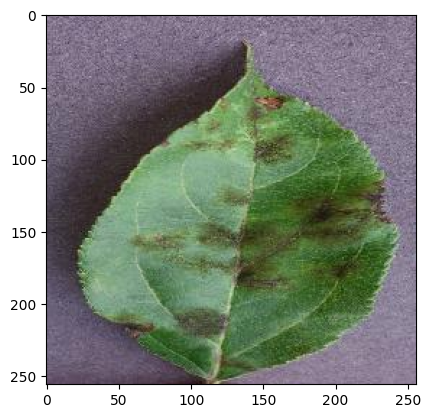

In [3]:
image = 'plantvillage dataset\color\Apple___Apple_scab\\0e90fe4a-e8b6-4186-9429-a9fea180af9a___FREC_Scab 3391.JPG'
img = mpimg.imread(image)
print(img.shape)
plt.imshow(img)
plt.show()

C- Image parametres:

In [4]:
img_size = 224
batch_size = 32

4. Train test split:

A- Image data generators:

In [5]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

B- Train generator:

In [6]:
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


C- Validation generator (test):

In [7]:
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


5. Neural Network:

A- Building the model:

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32 , (3,3), activation ='relu', input_shape= (img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64 , (3,3), activation ='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

B- Compiling the model:

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

C- Training  the model:

In [11]:
model.fit(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    epochs = 4,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/4
1358/1358 [==============================] - 1632s 1s/step - loss: 0.9785 - accuracy: 0.7302 - val_loss: 0.4871 - val_accuracy: 0.8494
Epoch 2/4
1358/1358 [==============================] - 1163s 857ms/step - loss: 0.2787 - accuracy: 0.9136 - val_loss: 0.4853 - val_accuracy: 0.8544
Epoch 3/4
1358/1358 [==============================] - 1027s 756ms/step - loss: 0.1310 - accuracy: 0.9586 - val_loss: 0.4961 - val_accuracy: 0.8678
Epoch 4/4
1358/1358 [==============================] - 1012s 745ms/step - loss: 0.0901 - accuracy: 0.9708 - val_loss: 0.6516 - val_accuracy: 0.8536


D- Model Evaluation:

In [12]:
val_loss , val_accuracy = model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation accuracy: {val_accuracy}")

339/339 [==============================] - 162s 479ms/step - loss: 0.6516 - accuracy: 0.8536
Validation accuracy: 0.853613555431366


E- Saving the model:

In [13]:
model.save('plant_model_main.h5')

F- Loadine the model:

In [8]:
from keras.models import load_model


# Charger le modèle
model = load_model('plant_model_main.h5')


5. Predictif systeme:

In [11]:
def load_process_image(image_path, target_size=(224,224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array.astype('float32') / 255
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_process_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(prediction,axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

A- The class indices:

In [12]:
class_indices = {v: k for k,v in train_generator.class_indices.items()}

In [13]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

B- Saving the class name:

In [14]:
json.dump(class_indices, open('class_indices.json' , 'w'))

C- Example:

1/1 [==============================] - 0s 369ms/step


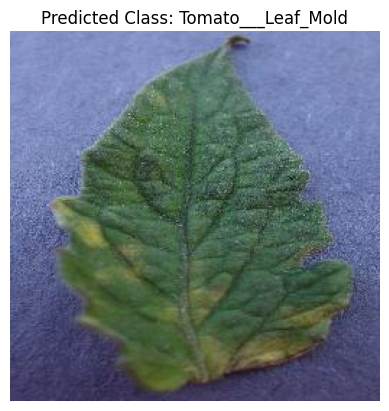

Predicted class name:  Tomato___Leaf_Mold


In [15]:
image_path = "plantvillage dataset\color\Tomato___Leaf_Mold\\0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG"

predicted_class = predict_image_class(model, image_path, class_indices)

# Affichage de l'image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')  # Cacher les axes
plt.show()
print("Predicted class name: ", predicted_class)